<a href="https://colab.research.google.com/github/mthonorio/calculo-numerico/blob/main/av_1/raizes_equacoes_bisseccao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Raízes de equações

$$ f(x) = 2x+3cos(x)-e^{x}$$

### Impotando as bibliotecas

In [ ]:
import sympy as sy

In [ ]:
from sympy import *

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import plotly.express as px

### Definido a função

In [ ]:
from sympy.abc import x

$$ f(x) = 2x+3cos(x)-e^{x}$$

In [ ]:
fx=-1*exp(-5.833*x)*(cos(31.743*x) + (5.833 / 31.743)*sin(31.743*x)); fx

-(0.18375704879816*sin(31.743*x) + cos(31.743*x))*exp(-5.833*x)

In [ ]:
f=sy.lambdify(x,fx,'numpy')

In [ ]:
x=np.linspace(0,0.1,1000)

### Plotagem do Gráfico

In [ ]:
fig = px.line (x = x,
               y = f(x),
               labels = {'y':'f(x)','x':'Valores de x'}, 
               template = 'presentation')
fig.show()

## Método da bissecção

$$ x_{k+1} = \dfrac{a_{k}+b_{k}}{2} $$

In [ ]:
def bissec(a,b,f,epsilon):
    i=0
    while(1):
        x= (a+b) / 2 

        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
        i=i+1
        if  ((abs(b-a)) < epsilon) or (abs(f(x)) < epsilon):
                break
        
    return x,i

In [ ]:
a = 0
b = 10
epsilon=0.001
x,i=bissec(a,b,f,epsilon)
print('Solução: {0:f} \nIterações: {1:d}'.format(x,i))

Solução: 1.579590 
Iterações: 12


In [ ]:
def bissec(a,b,f,epsilon):
    table = pd.DataFrame(columns=['a','b','x','f(a)','f(b)','f(x)','|b-a|'])
    i=0
    while(1):
        x= (a+b) / 2 

        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
        table.loc[i+1]=[a,b,x,f(a),f(b),f(x),abs(b-a)]
        i=i+1
        if  ((abs(b-a)) < epsilon) or (abs(f(x)) < epsilon):
                break
        
    return x,i,table

In [ ]:
a = 0.2
b = 0.3
epsilon=0.001
x,i,table=bissec(a,b,f,epsilon)
print('Solução: {0:f} \nIterações: {1:d}'.format(x,i))
table

Solução: 0.253125 
Iterações: 5


,a,b,x,f(a),f(b),f(x),|b-a|
1,0.250000,0.30000,0.250000,-0.023605,0.176084,-0.023605,0.050000
2,0.250000,0.27500,0.275000,-0.023605,0.130704,0.130704,0.025000
3,0.250000,0.26250,0.262500,-0.023605,0.064319,0.064319,0.012500
4,0.250000,0.25625,0.256250,-0.023605,0.022413,0.022413,0.006250
5,0.253125,0.25625,0.253125,-0.000178,0.022413,-0.000178,0.003125


## Método da Falsa-Posição

$$ x_{k+1} = \dfrac{a_{k}f(b_{k})+b_{k}f(a_{k})}{f(b)-f(a)} $$

In [ ]:
def false_pos(a,b,f,epsilon):
    i=0
    while(1): 
        x=(a*f(b)-b*f(a)) /(f(b)-f(a)) 

        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
        i+=1   
        if  ((abs(b-a)) < epsilon) or (abs(f(x)) < epsilon): 
            break
    return x,i

In [ ]:
a = 0
b = 2
epsilon=0.001
x,i=false_pos(a,b,f,epsilon)
print('Solução: {0:f} \nIterações: {1:d}'.format(x,i))

Solução: 1.239534 
Iterações: 8


In [ ]:
def false_pos(a,b,f,epsilon):
    i=0
    table = pd.DataFrame(columns=['a','b','x','f(a)','f(b)','f(x)','|b-a|'])
    while(1): 
        x=(a*f(b)-b*f(a)) /(f(b)-f(a)) 

        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
        table.loc[i+1]=[a,b,x,f(a),f(b),f(x),abs(b-a)]
        i+=1   
        if  ((abs(b-a)) < epsilon) or (abs(f(x)) < epsilon): 
            break
    return x,i,table

In [ ]:
a = 0
b = 2
epsilon=0.001
x,i,table=false_pos(a,b,f,epsilon)
print('Solução: {0:f} \nIterações: {1:d}'.format(x,i))
table

Solução: 1.239534 
Iterações: 8


,a,b,x,f(a),f(b),f(x),|b-a|
1,0.602637,2.0,0.602637,1.849876,-4.637497,1.849876,1.397363
2,1.001095,2.0,1.001095,0.899071,-4.637497,0.899071,0.998905
3,1.163305,2.0,1.163305,0.315038,-4.637497,0.315038,0.836695
4,1.216529,2.0,1.216529,0.098319,-4.637497,0.098319,0.783471
5,1.232794,2.0,1.232794,0.029596,-4.637497,0.029596,0.767206
6,1.237659,2.0,1.237659,0.008813,-4.637497,0.008813,0.762341
7,1.239105,2.0,1.239105,0.002616,-4.637497,0.002616,0.760895
8,1.239534,2.0,1.239534,0.000776,-4.637497,0.000776,0.760466


## Método de Newton

$$ x_{k+1}=x_{k}-\dfrac{f(x_{k})}{f'(x_{k})}$$

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sympy.abc import x

In [ ]:
def derivate (f,symbol):
    x=sy.Symbol(symbol)
    f_l = f.diff(x)
    fi = x - (f/f_l)
    fi = sy.lambdify(x,fi,"numpy") 
    return fi

$$ f(x) = 2x+3cos(x)-e^{x}$$

In [ ]:
fi=fx.diff(x);fi

-exp(x) - 3*sin(x) + 2

In [ ]:
fi=fx.diff(x)


fi=sy.lambdify(x,fi,'numpy')

In [ ]:
x=np.linspace(-2,2,1000)

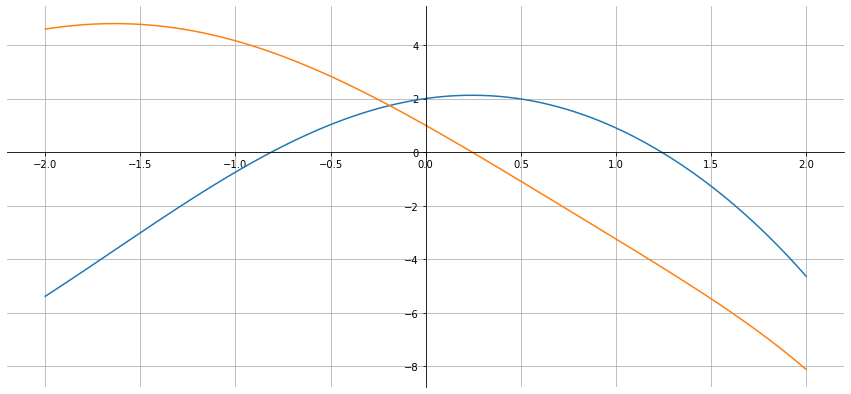

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
ax.plot(x,f(x))
ax.plot(x,fi(x))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0)) # Desloca o eixo x para 0
ax.spines['left'].set_position(('data',0)) # Desloca o eixo y para 0
ax.grid()
fig.show()

In [ ]:
def newton(x,f_s,f,symbol,epsilon):
    fi=derivate(f_s,symbol)
    i=0
    while (1):
        fx=f(x)
        aux=fi(x)
        i+=1
        if abs(fx)< epsilon   or abs(aux-x)<epsilon:
            break
        x=aux

    return x,i

In [ ]:
x,i=newton(1,fx,f,'x',epsilon)
print('Solução: {0:f} \nIterações: {1:d}'.format(x,i))

Solução: 1.240459 
Iterações: 3


In [ ]:
def newton(x,f_s,f,symbol,epsilon):
    fi=derivate(f_s,symbol)
    table = pd.DataFrame(columns=['x','f(x)','|x_k+1-x|'])
    i=0
    while (1):
        fx=f(x)
        aux=fi(x)

        table.loc[i+1]=[x,f(x),abs(aux-x)]
        i+=1

        if abs(fx)< epsilon   or abs(aux-x)<epsilon:
            break
        x=aux
        
    return x,i,table

In [ ]:
x,i,table=newton(1,fx,f,'x',epsilon)
print('Solução: {0:f} \nIterações: {1:d}'.format(x,i))
table

Solução: 1.240459 
Iterações: 3


,x,f(x),|x_k+1-x|
1,1.000000,0.902625,0.278356
2,1.278356,-0.169152,0.037898
3,1.240459,-0.003193,0.000744


## Métodos das Secantes

$$ x_{k+1}=x_{k}-\dfrac{f(x_{k})(x_{k-1}-x_{k})}{f(x_{k-1})-f(x_{k})}$$

In [ ]:
def secant(x1,x2,f,epsilon):
    i=0
    while(1):
        x= x2-(f(x2)*(x1-x2))/(f(x1)-f(x2))
        i+=1
        if epsilon > abs(f(x)): # criterio  de parada
            break
        x1=x2
        x2=x

    return x,i

In [ ]:
a=1
b=1.5
x,i=secant(a,b,f,epsilon)
print('Solução: {0:f} \nIterações: {1:d}'.format(x,i))

Solução: 1.239780 
Iterações: 3


In [ ]:
def secant(x1,x2,f,epsilon):
    i=0
    table = pd.DataFrame(columns=['a','b','x','f(a)','f(b)','f(x)','|b-a|'])  
    while(1):
        x= x2-(f(x2)*(x1-x2))/(f(x1)-f(x2))

        table.loc[i+1]=[x1,x2,x,f(x1),f(x2),f(x),abs(x2-x1)]
        i+=1
        if epsilon > abs(f(x)): # criterio  de parada
            break
        x1=x2
        x2=x

    return x,i,table

In [ ]:
a=1
b=1.5
x,i,table=secant(a,b,f,epsilon)
print('Solução: {0:f} \nIterações: {1:d}'.format(x,i))
table

Solução: 1.239780 
Iterações: 3


,a,b,x,f(a),f(b),f(x),|b-a|
1,1.000000,1.500000,1.207777,0.902625,-1.269477,0.134812,0.500000
2,1.500000,1.207777,1.235830,-1.269477,0.134812,0.016637,0.292223
3,1.207777,1.235830,1.239780,0.134812,0.016637,-0.000280,0.028053


### Referências

[Livro Cálculo Numérico - UFRGS](https://https://www.ufrgs.br/reamat/CalculoNumerico/livro-sci/main.html)

[Métodos Numéricos para Engenharia](https://https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/135)